## The Basics of NumPy Arrays

> Data manipulation in Python is nearly synonymous with NumPy array manipulation: even newer tools like Pandas are built around the NumPy array.
This section will present several examples of using NumPy array manipulation to access data and subarrays, and to split, reshape, and join the arrays.
While the types of operations shown here may seem a bit dry and pedantic, they comprise the building blocks of many other examples used throughout the book.
Get to know them well!

Python中的數據操作基本就是NumPy數組操作的同義詞：一些新的工具像Pandas 都是依賴於NumPy數組建立起來的。本節會展示使用NumPy數組操作和訪問數據以及子數組的一些例子，包括切分、變形和組合。儘管這裡展示的操作有些枯燥和學術化，但是它們是組成本書後面使用的例子的基礎。你應該更好的掌握它們。


> - *Attributes*: Determining the size, shape, memory consumption, and data types of arrays
> - *Indexing & Slicing*: Getting and setting the value of individual array elements
> - *Reshaping*: Changing the shape of a given array
> - *Joining & Splitting*: Combining multiple arrays into one, and splitting one array into many

### 1.NumPy : Attributes

> First let's discuss some useful array attributes.
We'll start by defining three random arrays, a one-dimensional, two-dimensional, and three-dimensional array.
We'll use NumPy's random number generator, which we will *seed* with a set value in order to ensure that the same random arrays are generated each time this code is run:

首先我們來討論一些數組有用的屬性。我們從定義三個數組開始，一個一維的，一個二維的和一個三維的數組。我們採用NumPy的隨機數產生器來創建數組，產生之前我們會給定一個隨機種子，這樣來保證每次代碼運行的時候都能得到相同的數組：

In [1]:
# np.random.random (defult = size) 只會從0-1 之間生成
import numpy as np
np.random.random((1,2))       
np.random.random((1,2))+6

array([[6.94974377, 6.67480968]])

In [2]:
# np.random.randint(low, high, size)
np.random.randint(0, 10, (1,2))
np.random.randint(0, 10, (3,3)) 
np.random.randint(10, size=6)
np.random.randint(10, size=(3, 4))

array([[6, 2, 3, 2],
       [6, 2, 4, 1],
       [2, 2, 6, 2]])

In [3]:
# np.random.choice
nps = np.array([52,-3, 48, 69, 32, 100, -12, 8])
np.random.choice(nps,5,replace=False)
np.random.choice(nps,5,replace=True)

np.random.choice(np.arange(0,10),(2,3),replace=True)
np.random.choice(np.arange(0,10),(2,3),replace=True)

array([[0, 8, 3],
       [7, 8, 1]])

In [4]:
# random.normal   正態分佈創建數組，均值0，標準差1，(3, 3)是維度說明，二維數組3行3列
np.random.normal(0, 1, (3, 3))

array([[-1.67982729,  0.42497255, -0.07798469],
       [ 0.83581694, -1.01652811,  0.1572187 ],
       [-0.77268701,  0.06368595, -0.83231626]])

#### Sorting

> This section covers algorithms related to sorting values in NumPy arrays.
These algorithms are a favorite topic in introductory computer science courses: if you've ever taken one, you probably have had heard about *insertion sorts*, *selection sorts*, *merge sorts*, *quick sorts*, *bubble sorts*, and many, many more. All are means of accomplishing a similar task: sorting the values in a list or array.

本小節我們會介紹對NumPy數組進行排序的算法。這些算法在基礎計算機科學領域是很熱門的課題：如果你學習過相關的課程的話，你可能聽過*插入排序*、*選擇排序*、*歸併排序*、*快速排序*、*冒泡排序*和其他很多很多名詞。這些都是為了完成一件工作：對數組進行排序。

In [5]:
import numpy as np
x=np.random.randint(low=1,high=100,size=(10))
np.unique(x)   # Sort 1D

array([ 4, 19, 32, 40, 51, 61, 76, 77, 91])

In [6]:
np.argsort(x)  # Sort index

array([2, 0, 4, 9, 6, 8, 7, 3, 1, 5])

In [7]:
y=np.random.randint(low=1,high=100,size=(3,5))
np.sort(x, axis=0)     # Sort 2D, sort by row
#np.sort(x, axis=1)     # Sort 2D, sort by col

array([ 4, 19, 19, 32, 40, 51, 61, 76, 77, 91])

- Selection Sort 選擇排序法

In [8]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:]) # 寻找子数组中的最小值的索引序号
        (x[i], x[swap]) = (x[swap], x[i]) # 交换当前值和最小值
    return x

x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

- Bogo Sort 演算法, 又稱為猴子排序(Monkey Sort)演算法

In [9]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

#### Partial Sorts: Partitioning 部分排序

> Sometimes we're not interested in sorting the entire array, but simply want to find the *k* smallest values in the array. NumPy provides this in the ``np.partition`` function. ``np.partition`` takes an array and a number *K*; the result is a new array with the smallest *K* values to the left of the partition, and the remaining values to the right, in arbitrary order:

有時候我們並不是需要對整個數組排序，而僅僅需要找到數組中的*K*個最小值。 NumPy提供了`np.partition`函數來完成這個任務；結果會分為兩部分，最小的*K*個值位於結果數組的左邊，而其餘的值位於數組的右邊，順序隨機：

In [10]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

## Example: k-Nearest Neighbors (KNN)

> Let's quickly see how we might use this ``argsort`` function along multiple axes to find the nearest neighbors of each point in a set.We'll start by creating a random set of 10 points on a two-dimensional plane. we'll arrange these in a $10\times 2$ array:

下面我們使用`argsort`沿著多個維度來尋找每個點的最近鄰。首先在一個二維平面上創建10個隨機點數據。這將是一個$10\times 2$的數組：

In [11]:
X = np.random.rand(10, 2)  # 10 x 2
X

array([[0.92512806, 0.82322132],
       [0.31718979, 0.06663371],
       [0.63744824, 0.43892501],
       [0.6620676 , 0.56367934],
       [0.5553618 , 0.51457277],
       [0.09687552, 0.72813443],
       [0.11016308, 0.10269745],
       [0.04513056, 0.95045852],
       [0.11259979, 0.74867175],
       [0.51487326, 0.08288348]])

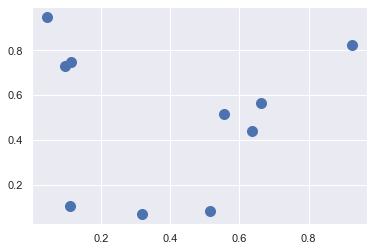

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:, 0], X[:, 1], s=100);

> Now we'll compute the distance between each pair of points.
Recall that the squared-distance between two points is the sum of the squared differences in each dimension;
using the efficient broadcasting ([Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb)) and aggregation ([Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb))  routines provided by NumPy we can compute the matrix of square distances in a single line of code:

現在讓我們來計算每兩個點之間的距離。距離平方的定義是兩點坐標差的平方和。應用廣播（[在數組上計算：廣播](02.05-Computation-on-arrays-broadcasting.ipynb)）和聚合([聚合：Min, Max, 以及其他](02.04-Computation-on-arrays-aggregates.ipynb))函數，我們可以使用一行代碼就能計算出所有點之間的距離平方：

In [13]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
dist_sq

array([[0.00000000e+00, 9.42013746e-01, 2.30443334e-01, 1.36562843e-01,
        2.31991012e-01, 6.95043777e-01, 1.18332256e+00, 7.90584907e-01,
        6.65759827e-01, 7.16409112e-01],
       [9.42013746e-01, 0.00000000e+00, 2.41166283e-01, 3.65995063e-01,
        2.57375311e-01, 4.86121575e-01, 4.41606507e-02, 8.55162518e-01,
        5.07032958e-01, 3.93428069e-02],
       [2.30443334e-01, 2.41166283e-01, 0.00000000e+00, 1.61697577e-02,
        1.24607691e-02, 3.75860948e-01, 3.91078605e-01, 6.12506769e-01,
        3.71408941e-01, 1.41790192e-01],
       [1.36562843e-01, 3.65995063e-01, 1.61697577e-02, 0.00000000e+00,
        1.37975828e-02, 3.46487551e-01, 5.17102899e-01, 5.30209438e-01,
        3.36137060e-01, 2.52830833e-01],
       [2.31991012e-01, 2.57375311e-01, 1.24607691e-02, 1.37975828e-02,
        0.00000000e+00, 2.55818240e-01, 3.67843179e-01, 4.50332297e-01,
        2.50840525e-01, 1.87994966e-01],
       [6.95043777e-01, 4.86121575e-01, 3.75860948e-01, 3.46487551e-01,
   

> This operation has a lot packed into it, and it might be a bit confusing if you're unfamiliar with NumPy's broadcasting rules. When you come across code like this, it can be useful to break it down into its component steps:

上面的這行代碼包含很多的內容值得探討，如果對於不是特別熟悉廣播機制的讀者來說，看起來可能會讓人難以理解。當你讀到這樣的代碼的時候，將它們打散成一步步的操作會有幫助：

In [14]:
# 計算每兩個點之間的坐標距離
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [15]:
# 計算距離的平方
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [16]:
# 按照最後一個維度求和
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [17]:
#你可以檢查這個矩陣的對角線元素，對角線元素的值是點與其自身的距離平方，應該全部為0：
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

> It checks out!
With the pairwise square-distances converted, we can now use ``np.argsort`` to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

確認正確。現在我們已經有了一個距離平方的矩陣，然後就可以使用`np.argsort`函數來按照每行來排序。最左邊的列就會給出每個點的最近鄰：

In [18]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 2 4 8 5 9 7 1 6]
 [1 9 6 2 4 3 5 8 7 0]
 [2 4 3 9 0 1 8 5 6 7]
 [3 4 2 0 9 8 5 1 6 7]
 [4 2 3 9 0 8 5 1 6 7]
 [5 8 7 4 3 2 6 1 9 0]
 [6 1 9 4 2 5 8 3 7 0]
 [7 8 5 4 3 2 6 0 1 9]
 [8 5 7 4 3 2 6 1 9 0]
 [9 1 2 6 4 3 5 8 0 7]]


> Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.By using a full sort here, we've actually done more work than we need to in this case. If we're simply interested in the nearest $k$ neighbors, all we need is to partition each row so that the smallest $k + 1$ squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the ``np.argpartition`` function:

第一列是0到9的數字：這是因為距離每個點最近的是自己，正如我們預料的一樣。上面我們進行了完整的排序，事實上我們並不需要這麼做。如果我們只是對最近的$K$個鄰居感興趣的話，我們可以使用分區來完成，只需要在距離平方矩陣中對每行進行$K+1$分區，只需要調用`np.argpartition`函數即可：

In [19]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

> In order to visualize this network of neighbors, let's quickly plot the points along with lines representing the connections from each point to its two nearest neighbors:

為了展示最近鄰的網絡結構，我們在圖中為每個點和它最近的兩個點之間連上線：

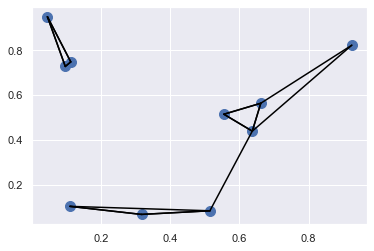

In [20]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# 為每個點和它最近的兩個點之間連上線
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # 從X[i]連線到X[j]
        # 使用一些zip的魔術方法畫線
        plt.plot(*zip(X[j], X[i]), color='black')

> Each point in the plot has lines drawn to its two nearest neighbors.
At first glance, it might seem strange that some of the points have more than two lines coming out of them: this is due to the fact that if point A is one of the two nearest neighbors of point B, this does not necessarily imply that point B is one of the two nearest neighbors of point A.

圖上的每個點都和與它最近的兩個點相連。初看起來，你可能注意到有些點的連線可能超過2條，這很奇怪：實際原因是如果A是B的最近兩個近鄰之一，並不代表著B也必須是A的最近兩個近鄰之一。

> Although the broadcasting and row-wise sorting of this approach might seem less straightforward than writing a loop, it turns out to be a very efficient way of operating on this data in Python.
You might be tempted to do the same type of operation by manually looping through the data and sorting each set of neighbors individually, but this would almost certainly lead to a slower algorithm than the vectorized version we used. The beauty of this approach is that it's written in a way that's agnostic to the size of the input data: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.

雖然使用廣播和逐行排序的方式完成任務可能沒有使用循環來的直觀，但是在Python中這是一種非常有效的方式。你可能忍不住使用循環的方式對每個點去計算它相應的最近鄰，但是這種方式幾乎肯定會比我們前面使用的向量化方案要慢很多。向量化的解法還有一個優點，那就是它不關心數據的尺寸：我們可以使用同樣的代碼和方法計算100個點或1,000,000個點以及任意維度數的數據的最近鄰。

> Finally, I'll note that when doing very large nearest neighbor searches, there are tree-based and/or approximate algorithms that can scale as $\mathcal{O}[N\log N]$ or better rather than the $\mathcal{O}[N^2]$ of the brute-force algorithm. One example of this is the KD-Tree, [implemented in Scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html).

最後，需要說明的是，當對一個非常大的數據集進行最近鄰搜索時，還有一種基於樹或相似的算法能夠將時間複雜度從$\mathcal{O}[N^2]$優化到$\mathcal{O}[N\log N]$或更好。其中一個例子是[KD-Tree](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html)。